In [94]:
from pyzabbix import ZabbixAPI
import pandas as pd
import pytz
import datetime
import time
import numpy as np
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import re
load_dotenv()

True

# Hostname/HostID

In [95]:
zapi = ZabbixAPI("http://10.10.10.20/zabbix")
hosts = zapi.host.get() #method host.get for hostid and hostname

#get host_id
df_host = pd.DataFrame(hosts)
df_host = df_host.filter(items=['hostid', 'host','name']).drop_duplicates()
df_host

,hostid,host,name
0,10439,360-Webserver-02,360-Webserver-02
1,10440,360-Webserver-03,360-Webserver-03
2,10441,360-Webserver-04,360-Webserver-04
3,10442,360-Webserver-05,360-Webserver-05
4,10443,360-Webserver-06,360-Webserver-06
5,10444,360-Webserver-07,360-Webserver-07
6,10479,10.10.10.14,Big Data Data node 1
7,10480,10.10.10.15,Big Data Data Node 2
8,10481,10.10.10.16,Big Data Data Node 3
9,10492,10.10.10.44,Datahub


# ItemID

In [96]:
data_item = zapi.item.get() #method item.get for itemid (this table got only lastest data)

# get item data
df = pd.DataFrame(data_item)
df.head()

,itemid,type,snmp_oid,hostid,name,key_,delay,history,trends,status,...,allow_traps,discover,uuid,state,error,parameters,lastclock,lastns,lastvalue,prevvalue
0,10020,0,,10001,Zabbix agent ping,agent.ping,1m,7d,365d,0,...,0,0,,0,,[],0,0,0,0
1,10059,0,,10001,Version of Zabbix agent running,agent.version,1h,7d,0,0,...,0,0,,0,,[],0,0,,
2,10061,5,,10047,Zabbix server: Number of processed numeric (fl...,"zabbix[wcache,values,float]",1m,1w,365d,0,...,0,0,de63f78f36e74361b6c9993d12d8b7c8,0,,[],0,0,0,0
3,10062,5,,10047,Zabbix server: Number of processed character v...,"zabbix[wcache,values,str]",1m,1w,365d,0,...,0,0,b58fdd85cd6a48489d0b983ee8ebe97b,0,,[],0,0,0,0
4,10063,5,,10047,Zabbix server: Number of processed log values ...,"zabbix[wcache,values,log]",1m,1w,365d,0,...,0,0,dae76dc6c4ce4707be7cf9534efc0233,0,,[],0,0,0,0


# merge df_item with df_host

In [97]:
#marge host and items to match hostid and itemid
df_merge = df_host.merge(df, left_on='hostid', right_on='hostid')
df_merge = df_merge.rename(columns={"name_x": "host_name", "name_y": "item_name"})
df_merge.head()

,hostid,host,host_name,itemid,type,snmp_oid,item_name,key_,delay,history,...,allow_traps,discover,uuid,state,error,parameters,lastclock,lastns,lastvalue,prevvalue
0,10439,360-Webserver-02,360-Webserver-02,36594,0,,Host name of Zabbix agent running,agent.hostname,1h,7d,...,0,0,,0,,[],1703700594,29763848,zabbix,
1,10439,360-Webserver-02,360-Webserver-02,36595,0,,Zabbix agent ping,agent.ping,1m,7d,...,0,0,,0,,[],1703737315,936270821,1,1
2,10439,360-Webserver-02,360-Webserver-02,36596,0,,Version of Zabbix agent running,agent.version,1h,7d,...,0,0,,0,,[],1703696996,464720621,5.4.1,
3,10439,360-Webserver-02,360-Webserver-02,36597,0,,Maximum number of open file descriptors,kernel.maxfiles,1h,7d,...,0,0,,0,,[],1703696997,495285435,9223372036854775807,0
4,10439,360-Webserver-02,360-Webserver-02,36598,0,,Maximum number of processes,kernel.maxproc,1h,7d,...,0,0,,0,,[],1703700598,119167721,4194304,0


# df_main

In [98]:
# cleasing
df_main = df_merge[df_merge['item_name'].str.contains('utilization', flags=re.IGNORECASE, regex=True)] # got item_name that contains only disk,cpu and memory (case-insensitive)
df_main =  df_main[['hostid','host','host_name','itemid','item_name','history','trends','lastclock','units','lastvalue','prevvalue','description']] #selected only columns we want

# change UNIXTIME to local datetime(UTC) and convert to local Bangkok time zone
df_main['lastclock'] = pd.to_datetime(df_main['lastclock'],unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok') 
df_main

C:\Users\sujar\AppData\Local\Temp\ipykernel_2492\1627230683.py:6: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_main['lastclock'] = pd.to_datetime(df_main['lastclock'],unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')


,hostid,host,host_name,itemid,item_name,history,trends,lastclock,units,lastvalue,prevvalue,description
40,10439,360-Webserver-02,360-Webserver-02,36634,CPU utilization,7d,365d,2023-12-28 11:22:24+07:00,%,0.1250440000000026,0.11254700000000639,CPU utilization in %
41,10439,360-Webserver-02,360-Webserver-02,36635,Memory utilization,7d,365d,2023-12-28 11:22:24+07:00,%,10.598934999999997,10.584500000000006,Memory used percentage is calculated as (100-p...
55,10439,360-Webserver-02,360-Webserver-02,37003,sda: Disk utilization,7d,365d,2023-12-28 11:22:24+07:00,%,0.2334001374201959,0.1266811980684299,This item is the percentage of elapsed time th...
61,10439,360-Webserver-02,360-Webserver-02,37009,/: Space utilization,7d,365d,2023-12-28 11:22:24+07:00,%,5.861113,5.861113,Space utilization in % for /
62,10439,360-Webserver-02,360-Webserver-02,37010,/boot: Space utilization,7d,365d,2023-12-28 11:22:24+07:00,%,56.495162,56.495162,Space utilization in % for /boot
...,...,...,...,...,...,...,...,...,...,...,...,...
3635,10522,10.10.10.164,maholan-web-wordpress,46960,/: Space utilization,7d,365d,2023-12-28 11:22:24+07:00,%,19.923709,19.919758,Space utilization in % for /
3655,10523,AD Server,AD Server,47014,CPU utilization,7d,365d,2023-12-28 11:22:24+07:00,%,0.141507,0.151056,CPU utilization in %
3665,10523,AD Server,AD Server,47024,Memory utilization,7d,365d,2023-12-28 11:22:24+07:00,%,43.47713559731616,43.493722483285616,Memory utilization in %
3679,10523,AD Server,AD Server,47065,0 C:: Disk utilization,7d,365d,2023-12-28 11:22:24+07:00,%,4.503327,6.310202,This item is the percentage of elapsed time th...


# CPU utilizarion

In [99]:
#find itemid for CPU utilization
df_cpu = df_main[df_main['item_name'].str.contains('CPU utilization', flags=re.IGNORECASE, regex=True)]
df_cpu = df_cpu.filter(items=['hostid','host_name','itemid','item_name','units','history','trends','description']).drop_duplicates() 
df_cpu 

,hostid,host_name,itemid,item_name,units,history,trends,description
40,10439,360-Webserver-02,36634,CPU utilization,%,7d,365d,CPU utilization in %
115,10440,360-Webserver-03,36700,CPU utilization,%,7d,365d,CPU utilization in %
182,10441,360-Webserver-04,36766,CPU utilization,%,7d,365d,CPU utilization in %
249,10442,360-Webserver-05,36832,CPU utilization,%,7d,365d,CPU utilization in %
316,10443,360-Webserver-06,36898,CPU utilization,%,7d,365d,CPU utilization in %
391,10444,360-Webserver-07,36964,CPU utilization,%,7d,365d,CPU utilization in %
458,10479,Big Data Data node 1,39665,CPU utilization,%,7d,365d,CPU utilization in %
866,10480,Big Data Data Node 2,39731,CPU utilization,%,7d,365d,CPU utilization in %
1282,10481,Big Data Data Node 3,40161,CPU utilization,%,7d,365d,CPU utilization in %
1698,10492,Datahub,44300,CPU utilization,%,7d,365d,CPU utilization in %


In [100]:
#start_date = datetime.datetime.today() + relativedelta(months=-1) #last one month from present
start_date = datetime.datetime.today().replace(day=1, hour=0, minute=0, second=1, microsecond=0) #first day of month
#start_date = datetime.datetime.strptime("2023-12-1 01:01:01", "%Y-%m-%d %H:%M:%S") # select by date
end_date = datetime.datetime.today() 
#end_date = datetime.datetime.strptime("2023-11-19 01:01:01", "%Y-%m-%d %H:%M:%S") # select by date

start_unix = time.mktime(start_date.timetuple()) #start date
end_unix = time.mktime(end_date.timetuple()) #end date
print(f"start_date : {start_date} >>  start_unix : {start_unix}")
print(f"end_date : {end_date} >> end_unix : {end_unix}")

#get trend data
method = "trend.get" 
params = {

        "itemids" : df_cpu['itemid'].tolist(),	
        "time_from": int(start_unix),
        "time_till": int(end_unix),

}
result = zapi.do_request( method,params=params)
    
df_cpu_trend = pd.DataFrame(result['result'])
df_cpu_trend['clock'] = pd.to_datetime(df_cpu_trend['clock'],unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok') 

#change data type
df_cpu_trend['value_avg'] = df_cpu_trend['value_avg'].astype(float) 

df_cpu_trend

start_date : 2023-12-01 00:00:01 >>  start_unix : 1701363601.0
end_date : 2023-12-28 11:22:43.107827 >> end_unix : 1703737363.0


C:\Users\sujar\AppData\Local\Temp\ipykernel_2492\2860866163.py:24: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_cpu_trend['clock'] = pd.to_datetime(df_cpu_trend['clock'],unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')


,itemid,clock,num,value_min,value_avg,value_max
0,36634,2023-12-01 00:59:28+07:00,60,0.09377299999999877,0.140012,0.2167429999999939
1,36634,2023-12-01 01:59:12+07:00,60,0.10420399999999574,0.129136,0.17924499999999455
2,36634,2023-12-01 03:01:04+07:00,60,0.09794300000000078,0.127540,0.20214199999999494
3,36634,2023-12-01 04:00:48+07:00,60,0.09379099999999596,0.127506,0.18339799999999684
4,36634,2023-12-01 05:00:32+07:00,60,0.09169699999999636,0.134523,0.5210500000000025
...,...,...,...,...,...,...
25043,47014,2023-12-28 06:00:16+07:00,60,0.112978,0.245392,2.449308
25044,47014,2023-12-28 07:00:00+07:00,60,0.109677,0.174973,0.359547
25045,47014,2023-12-28 07:59:44+07:00,60,0.113205,0.174100,0.411264
25046,47014,2023-12-28 08:59:28+07:00,60,0.109742,0.388542,2.687228


In [101]:
# avg month cpu
df_cpu_trend_avg_month = df_cpu_trend.copy()
df_cpu_trend_avg_month['mean_value'] = df_cpu_trend_avg_month.groupby('itemid')['value_avg'].transform(np.mean)
df_cpu_trend_avg_month = df_cpu_trend_avg_month.merge(df_cpu, left_on='itemid', right_on='itemid')
df_cpu_trend_avg_month = df_cpu_trend_avg_month.filter(items=['mean_value','host_name']).drop_duplicates(ignore_index=True)
df_cpu_trend_avg_month['label'] = "cpu_trend_avg_month"
df_cpu_trend_avg_month

,mean_value,host_name,label
0,0.130348,360-Webserver-02,cpu_trend_avg_month
1,0.210664,360-Webserver-03,cpu_trend_avg_month
2,0.172522,360-Webserver-04,cpu_trend_avg_month
3,0.148566,360-Webserver-05,cpu_trend_avg_month
4,0.322616,360-Webserver-06,cpu_trend_avg_month
5,0.048714,360-Webserver-07,cpu_trend_avg_month
6,2.498794,Big Data Data node 1,cpu_trend_avg_month
7,3.311732,Big Data Data Node 2,cpu_trend_avg_month
8,2.258197,Big Data Data Node 3,cpu_trend_avg_month
9,0.113782,Datahub,cpu_trend_avg_month


In [102]:
# avg day cpu
df_cpu_trend_avg_day = df_cpu_trend.copy()
df_cpu_trend_avg_day ['day']  = df_cpu_trend_avg_day['clock'].dt.day.values
df_cpu_trend_avg_day['mean_value'] = df_cpu_trend_avg_day.groupby(['itemid','day'])['value_avg'].transform(np.mean)
df_cpu_trend_avg_day = df_cpu_trend_avg_day.merge(df_cpu, left_on='itemid', right_on='itemid')
df_cpu_trend_avg_day = df_cpu_trend_avg_day.filter(items=['mean_value','host_name','day']).drop_duplicates(ignore_index=True)
#df_cpu_trend_avg_day[df_cpu_trend_avg_day['day']== '36634']
df_cpu_trend_avg_day['label'] = 'cpu_trend_avg_day' 
df_cpu_trend_avg_day

,mean_value,host_name,day,label
0,0.133764,360-Webserver-02,1,cpu_trend_avg_day
1,0.131134,360-Webserver-02,2,cpu_trend_avg_day
2,0.132386,360-Webserver-02,3,cpu_trend_avg_day
3,0.132821,360-Webserver-02,4,cpu_trend_avg_day
4,0.134327,360-Webserver-02,5,cpu_trend_avg_day
...,...,...,...,...
1062,1.249072,maholan-web-wordpress,27,cpu_trend_avg_day
1063,1.163211,maholan-web-wordpress,28,cpu_trend_avg_day
1064,0.219992,AD Server,26,cpu_trend_avg_day
1065,0.201926,AD Server,27,cpu_trend_avg_day


# Memory Utilizaiton

In [103]:
#find itemid for memory utilization
df_mem = df_main[df_main['item_name'].str.contains('memory utilization', flags=re.IGNORECASE, regex=True)]
df_mem = df_mem.filter(items=['hostid','host_name','itemid','item_name','units','history','trends','description']).drop_duplicates() 
df_mem 

,hostid,host_name,itemid,item_name,units,history,trends,description
41,10439,360-Webserver-02,36635,Memory utilization,%,7d,365d,Memory used percentage is calculated as (100-p...
116,10440,360-Webserver-03,36701,Memory utilization,%,7d,365d,Memory used percentage is calculated as (100-p...
183,10441,360-Webserver-04,36767,Memory utilization,%,7d,365d,Memory used percentage is calculated as (100-p...
250,10442,360-Webserver-05,36833,Memory utilization,%,7d,365d,Memory used percentage is calculated as (100-p...
317,10443,360-Webserver-06,36899,Memory utilization,%,7d,365d,Memory used percentage is calculated as (100-p...
392,10444,360-Webserver-07,36965,Memory utilization,%,7d,365d,Memory used percentage is calculated as (100-p...
459,10479,Big Data Data node 1,39666,Memory utilization,%,7d,365d,Memory used percentage is calculated as (100-p...
867,10480,Big Data Data Node 2,39732,Memory utilization,%,7d,365d,Memory used percentage is calculated as (100-p...
1283,10481,Big Data Data Node 3,40162,Memory utilization,%,7d,365d,Memory used percentage is calculated as (100-p...
1699,10492,Datahub,44301,Memory utilization,%,7d,365d,Memory used percentage is calculated as (100-p...


In [104]:
#start_date = datetime.datetime.today() + relativedelta(months=-1) #last one month from present
start_date = datetime.datetime.today().replace(day=1, hour=0, minute=0, second=1, microsecond=0) #first day of month
#start_date = datetime.datetime.strptime("2023-12-1 01:01:01", "%Y-%m-%d %H:%M:%S") # select by date
end_date = datetime.datetime.today() 
#end_date = datetime.datetime.strptime("2023-11-19 01:01:01", "%Y-%m-%d %H:%M:%S") # select by date

start_unix = time.mktime(start_date.timetuple()) #start date
end_unix = time.mktime(end_date.timetuple()) #end date
print(f"start_date : {start_date} >>  start_unix : {start_unix}")
print(f"end_date : {end_date} >> end_unix : {end_unix}")

#get trend data
method = "trend.get" 
params = {

        "itemids" : df_mem['itemid'].tolist(),	
        "time_from": int(start_unix),
        "time_till": int(end_unix),

}
result = zapi.do_request( method,params=params)
    
df_mem_trend = pd.DataFrame(result['result'])
df_mem_trend['clock'] = pd.to_datetime(df_mem_trend['clock'],unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok') 

#change data type
df_mem_trend['value_avg'] = df_mem_trend['value_avg'].astype(float) 

df_mem_trend

start_date : 2023-12-01 00:00:01 >>  start_unix : 1701363601.0
end_date : 2023-12-28 11:22:45.290809 >> end_unix : 1703737365.0


C:\Users\sujar\AppData\Local\Temp\ipykernel_2492\1998151102.py:24: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_mem_trend['clock'] = pd.to_datetime(df_mem_trend['clock'],unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')


,itemid,clock,num,value_min,value_avg,value_max
0,36635,2023-12-01 00:59:28+07:00,60,10.421892,10.443722,10.467650000000006
1,36635,2023-12-01 01:59:12+07:00,60,10.414232999999996,10.455961,10.480759000000006
2,36635,2023-12-01 03:01:04+07:00,60,10.403087999999997,10.431719,10.468534000000005
3,36635,2023-12-01 04:00:48+07:00,60,10.409274999999994,10.433212,10.450663000000006
4,36635,2023-12-01 05:00:32+07:00,60,10.402990000000003,10.425818,10.448747999999995
...,...,...,...,...,...,...
25043,47024,2023-12-28 06:00:16+07:00,60,43.0426354464613,43.137778,43.689095028080935
25044,47024,2023-12-28 07:00:00+07:00,60,43.06360737125026,43.117160,43.37461148317742
25045,47024,2023-12-28 07:59:44+07:00,60,43.08515125762437,43.132998,43.38938715746055
25046,47024,2023-12-28 08:59:28+07:00,60,41.72998360853424,43.322926,46.785361405843446


In [105]:
# avg month mem
df_mem_trend_avg_month = df_mem_trend.copy()
df_mem_trend_avg_month['mean_value'] = df_mem_trend_avg_month.groupby('itemid')['value_avg'].transform(np.mean)
df_mem_trend_avg_month = df_mem_trend_avg_month.merge(df_mem, left_on='itemid', right_on='itemid')
df_mem_trend_avg_month = df_mem_trend_avg_month.filter(items=['mean_value','host_name']).drop_duplicates(ignore_index=True)
df_mem_trend_avg_month['label'] = 'mem_trend_avg_month'
df_mem_trend_avg_month

,mean_value,host_name,label
0,10.566468,360-Webserver-02,mem_trend_avg_month
1,11.314713,360-Webserver-03,mem_trend_avg_month
2,8.892218,360-Webserver-04,mem_trend_avg_month
3,14.424712,360-Webserver-05,mem_trend_avg_month
4,17.001634,360-Webserver-06,mem_trend_avg_month
5,7.933278,360-Webserver-07,mem_trend_avg_month
6,27.410074,Big Data Data node 1,mem_trend_avg_month
7,32.786667,Big Data Data Node 2,mem_trend_avg_month
8,26.868706,Big Data Data Node 3,mem_trend_avg_month
9,4.062368,Datahub,mem_trend_avg_month


In [106]:
# avg day mem
df_mem_trend_avg_day = df_mem_trend.copy()
df_mem_trend_avg_day ['day']  = df_mem_trend_avg_day['clock'].dt.day.values
df_mem_trend_avg_day['mean_value'] = df_mem_trend_avg_day.groupby(['itemid','day'])['value_avg'].transform(np.mean)
df_mem_trend_avg_day = df_mem_trend_avg_day.merge(df_mem, left_on='itemid', right_on='itemid')
df_mem_trend_avg_day = df_mem_trend_avg_day.filter(items=['mean_value','host_name','day']).drop_duplicates(ignore_index=True)
#df_mem_trend_avg_day[df_mem_trend_avg_day['itemid']== '36635']
df_mem_trend_avg_day['label'] = 'mem_trend_avg_day'
df_mem_trend_avg_day

,mean_value,host_name,day,label
0,10.511973,360-Webserver-02,1,mem_trend_avg_day
1,10.519345,360-Webserver-02,2,mem_trend_avg_day
2,10.461640,360-Webserver-02,3,mem_trend_avg_day
3,10.534279,360-Webserver-02,4,mem_trend_avg_day
4,10.477441,360-Webserver-02,5,mem_trend_avg_day
...,...,...,...,...
1062,27.576349,maholan-web-wordpress,27,mem_trend_avg_day
1063,26.312195,maholan-web-wordpress,28,mem_trend_avg_day
1064,42.364213,AD Server,26,mem_trend_avg_day
1065,42.630628,AD Server,27,mem_trend_avg_day


# disk utilization

In [107]:
#find itemid for disk utilization
df_disk = df_main[df_main['item_name'].str.contains('disk utilization', flags=re.IGNORECASE, regex=True)]
df_disk = df_disk.filter(items=['hostid','host_name','itemid','item_name','units','history','trends','description']).drop_duplicates() 
df_disk

,hostid,host_name,itemid,item_name,units,history,trends,description
55,10439,360-Webserver-02,37003,sda: Disk utilization,%,7d,365d,This item is the percentage of elapsed time th...
130,10440,360-Webserver-03,37028,sda: Disk utilization,%,7d,365d,This item is the percentage of elapsed time th...
197,10441,360-Webserver-04,37053,sda: Disk utilization,%,7d,365d,This item is the percentage of elapsed time th...
264,10442,360-Webserver-05,37086,sda: Disk utilization,%,7d,365d,This item is the percentage of elapsed time th...
339,10443,360-Webserver-06,37119,sda: Disk utilization,%,7d,365d,This item is the percentage of elapsed time th...
...,...,...,...,...,...,...,...,...
3425,10519,talend-win,46744,sda: Disk utilization,%,7d,365d,This item is the percentage of elapsed time th...
3488,10520,J4API2,46765,sda: Disk utilization,%,7d,365d,This item is the percentage of elapsed time th...
3559,10521,proxy-server-238,46926,sda: Disk utilization,%,7d,365d,This item is the percentage of elapsed time th...
3630,10522,maholan-web-wordpress,46955,sda: Disk utilization,%,7d,365d,This item is the percentage of elapsed time th...


In [108]:
#start_date = datetime.datetime.today() + relativedelta(months=-1) #last one month from present
start_date = datetime.datetime.today().replace(day=1, hour=0, minute=0, second=1, microsecond=0) #first day of month
#start_date = datetime.datetime.strptime("2023-12-1 01:01:01", "%Y-%m-%d %H:%M:%S") # select by date
end_date = datetime.datetime.today() 
#end_date = datetime.datetime.strptime("2023-11-19 01:01:01", "%Y-%m-%d %H:%M:%S") # select by date

start_unix = time.mktime(start_date.timetuple()) #start date
end_unix = time.mktime(end_date.timetuple()) #end date
print(f"start_date : {start_date} >>  start_unix : {start_unix}")
print(f"end_date : {end_date} >> end_unix : {end_unix}")

#get trend data
method = "trend.get" 
params = {

        "itemids" : df_disk['itemid'].tolist(),	
        "time_from": int(start_unix),
        "time_till": int(end_unix),

}
result = zapi.do_request( method,params=params)
    
df_disk_trend = pd.DataFrame(result['result'])
df_disk_trend['clock'] = pd.to_datetime(df_disk_trend['clock'],unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok') 

#change data type
df_disk_trend['value_avg'] = df_disk_trend['value_avg'].astype(float) 

df_disk_trend

start_date : 2023-12-01 00:00:01 >>  start_unix : 1701363601.0
end_date : 2023-12-28 11:22:47.948675 >> end_unix : 1703737367.0


C:\Users\sujar\AppData\Local\Temp\ipykernel_2492\250190896.py:24: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_disk_trend['clock'] = pd.to_datetime(df_disk_trend['clock'],unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Bangkok')


,itemid,clock,num,value_min,value_avg,value_max
0,37003,2023-12-01 00:59:28+07:00,60,0.1323456870651069,0.349523,1.1726409589642934
1,37003,2023-12-01 01:59:12+07:00,60,0.11951615378494507,0.252392,0.9614812118851841
2,37003,2023-12-01 03:01:04+07:00,60,0.09985036996864041,0.232214,0.664568513595178
3,37003,2023-12-01 04:00:48+07:00,60,0.11308458979893055,0.248266,0.7052114320823323
4,37003,2023-12-01 05:00:32+07:00,60,0.11973544767739906,0.281219,0.8978901756489854
...,...,...,...,...,...,...
72418,47065,2023-12-28 06:00:16+07:00,60,5.249121,7.834787,35.902345
72419,47065,2023-12-28 07:00:00+07:00,60,5.384054,7.320612,13.279289
72420,47065,2023-12-28 07:59:44+07:00,60,5.068495,7.746565,21.334798
72421,47065,2023-12-28 08:59:28+07:00,60,5.073351,9.776896,74.097324


In [109]:
# avg month disk
df_disk_trend_avg_month = df_disk_trend.copy()
df_disk_trend_avg_month = df_disk_trend_avg_month.merge(df_disk, left_on='itemid', right_on='itemid')
df_disk_trend_avg_month['mean_value'] = df_disk_trend_avg_month.groupby('hostid')['value_avg'].transform(np.mean)
df_disk_trend_avg_month = df_disk_trend_avg_month.filter(items=['mean_value','host_name']).drop_duplicates(ignore_index=True)
df_disk_trend_avg_month['label'] = 'disk_trend_avg_month'
df_disk_trend_avg_month

,mean_value,host_name,label
0,0.237976,360-Webserver-02,disk_trend_avg_month
1,0.388035,360-Webserver-03,disk_trend_avg_month
2,0.475906,360-Webserver-04,disk_trend_avg_month
3,0.290078,360-Webserver-05,disk_trend_avg_month
4,1.133899,360-Webserver-06,disk_trend_avg_month
5,0.070003,360-Webserver-07,disk_trend_avg_month
6,0.033646,Big Data Data node 1,disk_trend_avg_month
7,0.022159,Big Data Data Node 2,disk_trend_avg_month
8,0.013121,Big Data Data Node 3,disk_trend_avg_month
9,0.855755,Datahub,disk_trend_avg_month


In [110]:
# avg day disk
df_disk_trend_avg_day = df_disk_trend.copy()
df_disk_trend_avg_day ['day']  = df_disk_trend_avg_day['clock'].dt.day.values
df_disk_trend_avg_day = df_disk_trend_avg_day.merge(df_disk, left_on='itemid', right_on='itemid')
df_disk_trend_avg_day['mean_value'] = df_disk_trend_avg_day.groupby(['hostid','day'])['value_avg'].transform(np.mean)
df_disk_trend_avg_day = df_disk_trend_avg_day.filter(items=['mean_value','host_name','day']).drop_duplicates(ignore_index=True)
#df_disk_trend_avg_day[df_disk_trend_avg_day['itemid']== '36635']
df_disk_trend_avg_day['label'] = 'disk_trend_avg_day'
df_disk_trend_avg_day

,mean_value,host_name,day,label
0,0.253030,360-Webserver-02,1,disk_trend_avg_day
1,0.221717,360-Webserver-02,2,disk_trend_avg_day
2,0.236750,360-Webserver-02,3,disk_trend_avg_day
3,0.218094,360-Webserver-02,4,disk_trend_avg_day
4,0.248053,360-Webserver-02,5,disk_trend_avg_day
...,...,...,...,...
1062,1.204830,Talen-server2,27,disk_trend_avg_day
1063,1.164600,Talen-server2,28,disk_trend_avg_day
1064,8.463159,AD Server,26,disk_trend_avg_day
1065,7.597786,AD Server,27,disk_trend_avg_day


## daily trend

In [111]:
df_avg_day = pd.concat([df_cpu_trend_avg_day, df_mem_trend_avg_day,df_disk_trend_avg_day], ignore_index=True)
df_avg_day

,mean_value,host_name,day,label
0,0.133764,360-Webserver-02,1,cpu_trend_avg_day
1,0.131134,360-Webserver-02,2,cpu_trend_avg_day
2,0.132386,360-Webserver-02,3,cpu_trend_avg_day
3,0.132821,360-Webserver-02,4,cpu_trend_avg_day
4,0.134327,360-Webserver-02,5,cpu_trend_avg_day
...,...,...,...,...
3196,1.204830,Talen-server2,27,disk_trend_avg_day
3197,1.164600,Talen-server2,28,disk_trend_avg_day
3198,8.463159,AD Server,26,disk_trend_avg_day
3199,7.597786,AD Server,27,disk_trend_avg_day


## connect db PG

In [112]:
system_info_config = {
    'host' : os.environ.get("SYSTEM_INFO_HOST"),
    'port' : os.environ.get("SYSTEM_INFO_PORT"),
    'user' : os.environ.get("SYSTEM_INFO_USER"),
    'password' : os.environ.get("SYSTEM_INFO_PASS"),
    'database' : os.environ.get("SYSTEM_INFO_DB")
}

print(system_info_config)

{'host': '10.10.10.200', 'port': '5432', 'user': 'system', 'password': 'FJNCEHfV', 'database': 'system'}


In [113]:
db_connection_url = f"postgresql://{system_info_config['user']}:{system_info_config['password']}@{system_info_config['host']}:{system_info_config['port']}/{system_info_config['database']}"
conn = create_engine(db_connection_url)
sql = "select * from server_info"
df_info = pd.read_sql_query(sql, conn)
df_info

,server_name,ip_address,hostname,server_type,operating_system,services_software,cpu_total,cpu_unit,memory_total,memory_unit,disk_total,disk_unit
0,360-Webserver-01,10.10.10.22,web1.bigdata.local,Virtual Server,Ubuntu 20.04 LTS,"Frontend , Nginx",8,core,8,GB,250,GB
1,360-Webserver-02,10.10.10.23,web2.bigdata.local,Virtual Server,Ubuntu 20.04 LTS,"Frontend , Nginx",8,core,8,GB,250,GB
2,Big Data Data node 1,10.10.10.14,cdhdn1.bigdata.local,Physical Server,Centos 7.9,"DataNode, Impala",24,core,128,GB,12,TB
3,Big Data Data Node 2,10.10.10.15,cdhdn2.bigdata.local,Physical Server,Centos 7.9,"DataNode, Impala",24,core,128,GB,12,TB
4,Big Data Data Node 3,10.10.10.16,cdhdn3.bigdata.local,Physical Server,Centos 7.9,"DataNode, Impala",24,core,128,GB,12,TB
5,CDH6-Master-Node-1,10.10.10.200,cdhmn1.bigdata.local,Virtual Server,Centos 7.9,"CM, Hue, Atlas, Ranger, Hive",16,core,64,GB,250,GB


## loop for pie graph

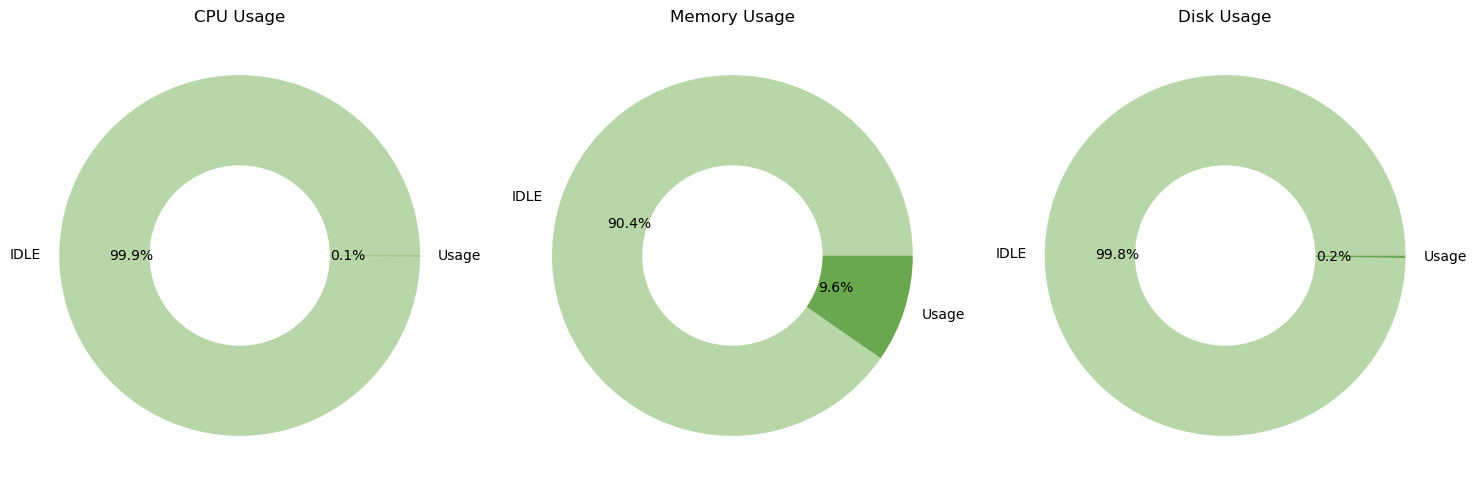

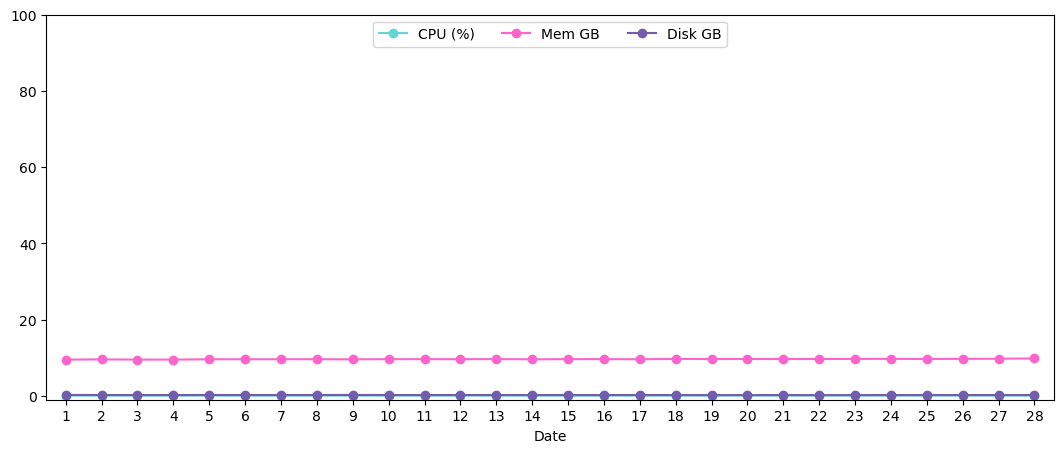

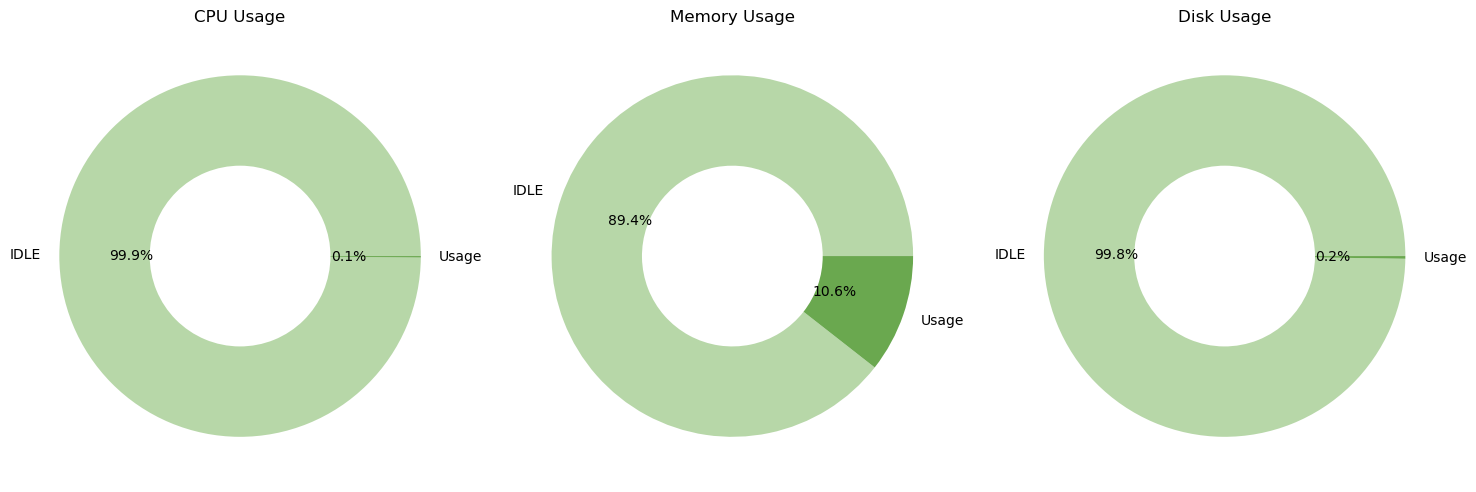

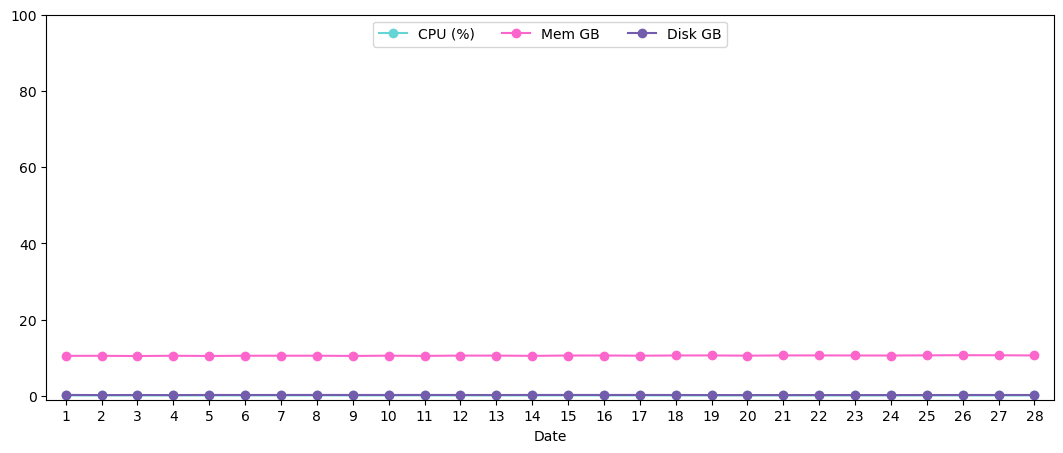

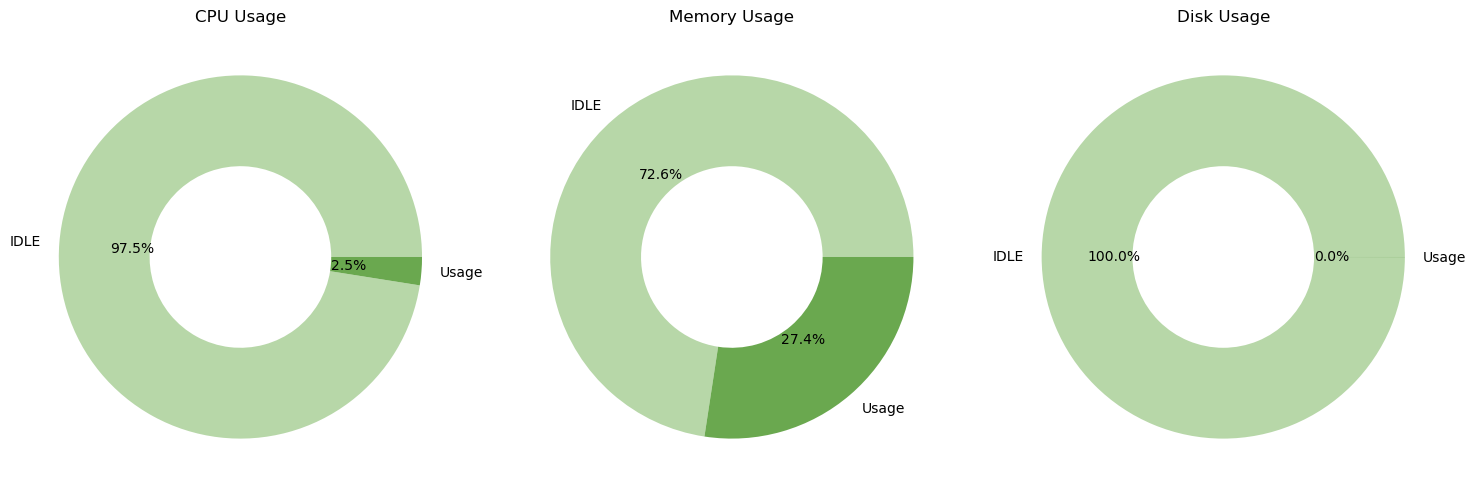

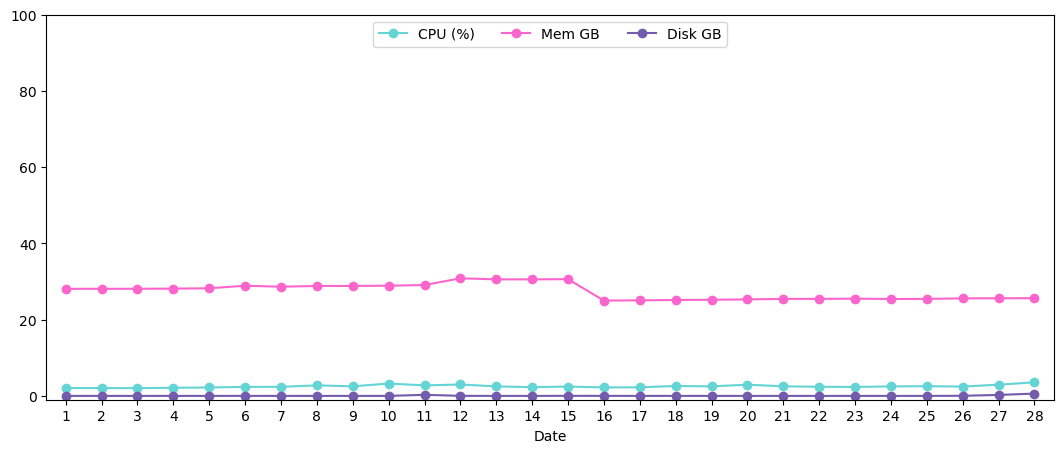

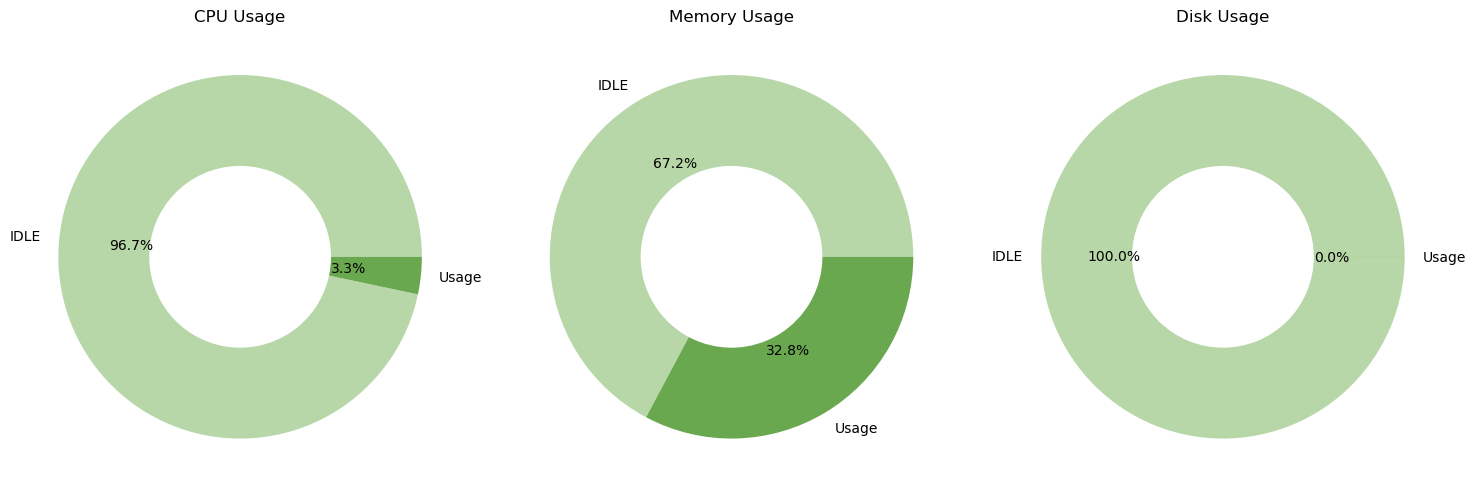

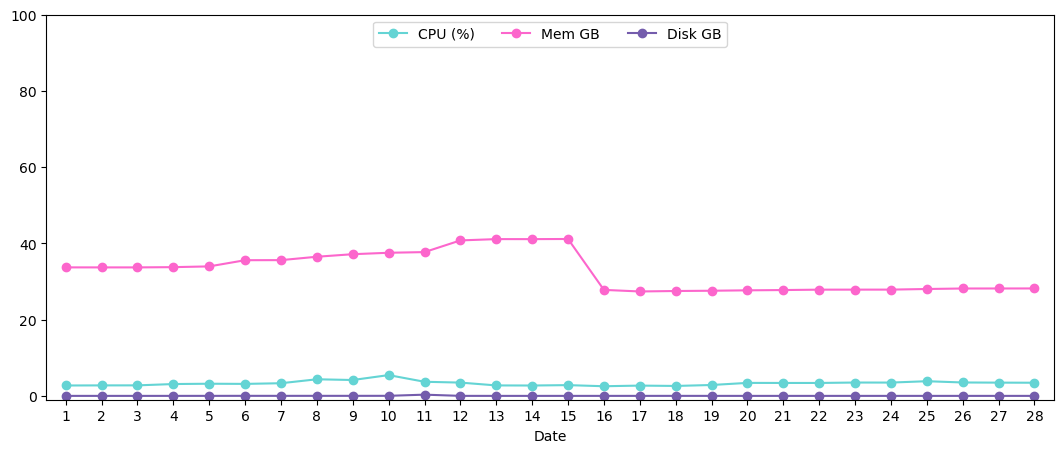

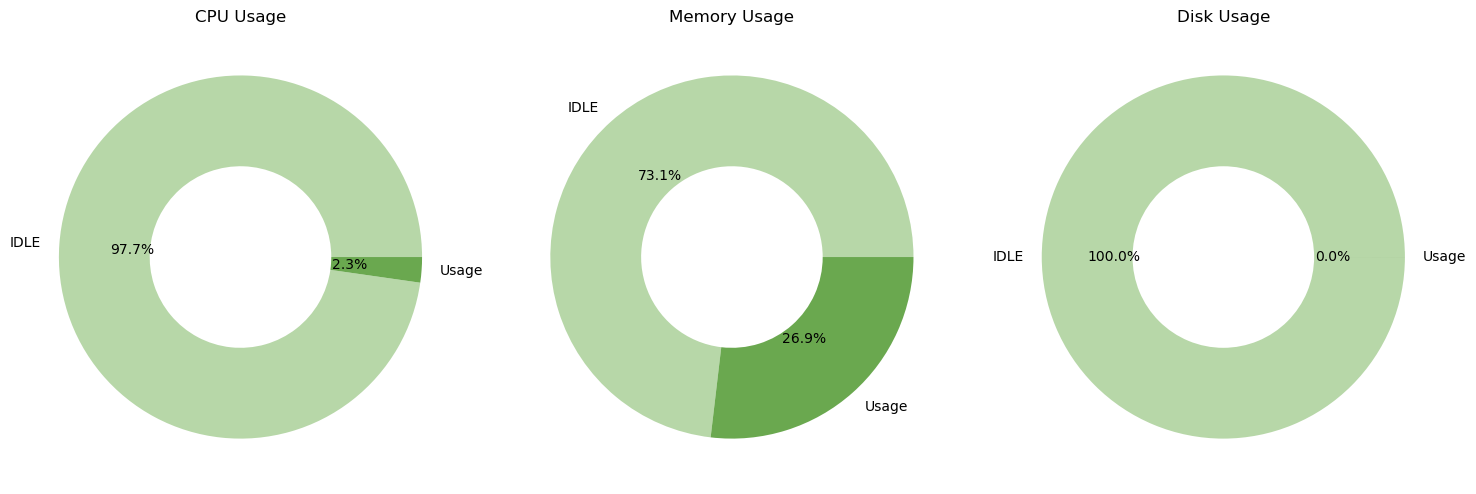

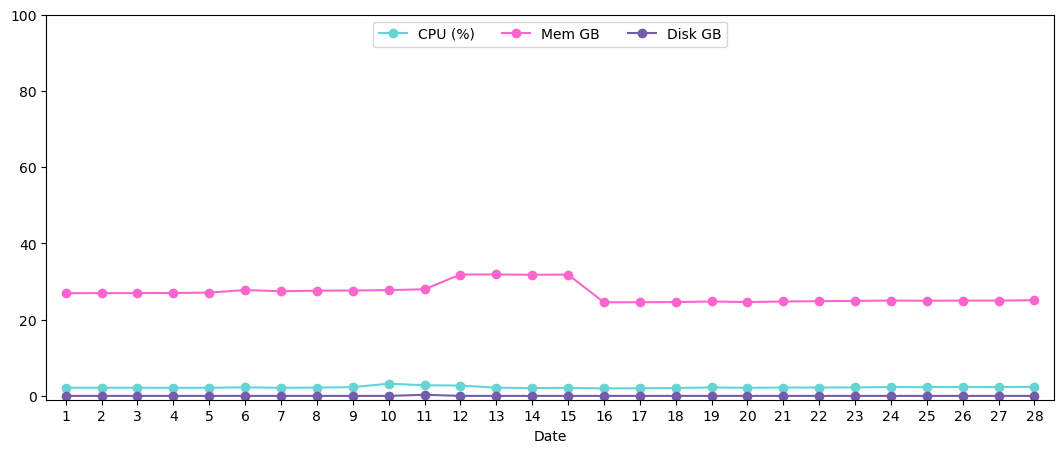

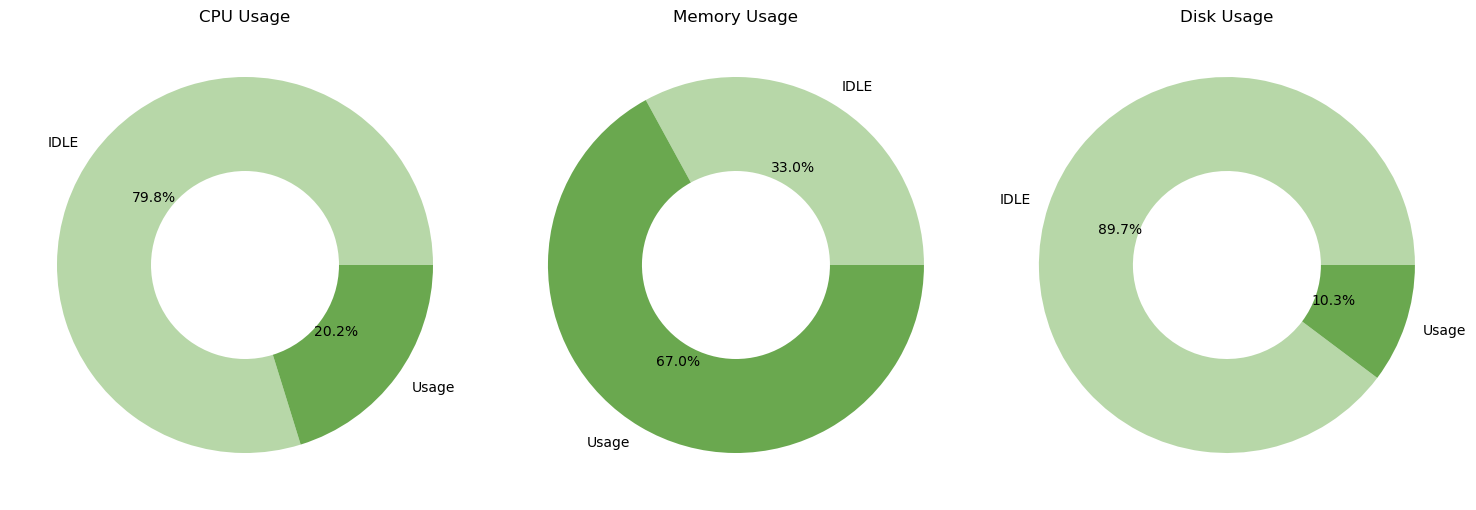

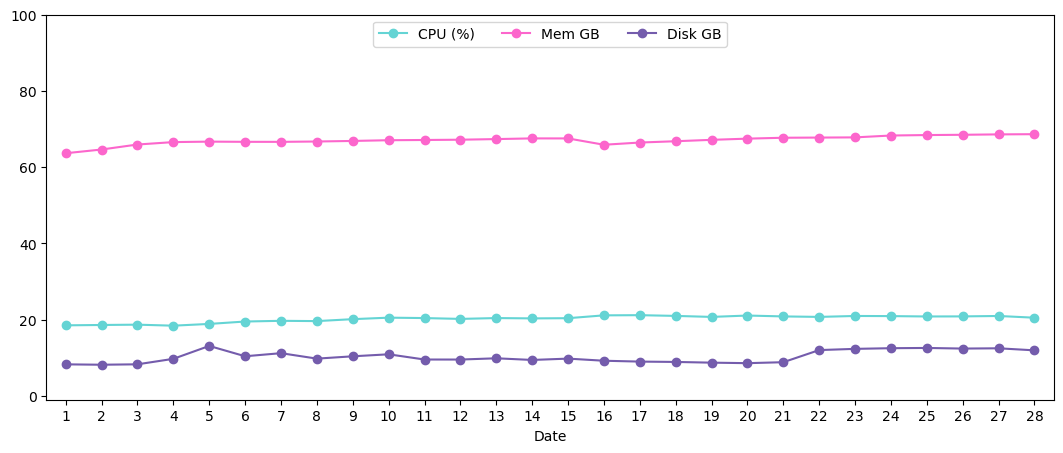

[{'server_name': 'Server Name : 360-Webserver-01', 'ip_address': 'IP : 10.10.10.22', 'type': 'Type : Virtual Server OS : Ubuntu 20.04 LTS', 'host_name': 'Hostname : web1.bigdata.local', 'server_software': 'Services/Software: Frontend , Nginx', 'pie_chart': './360-Webserver-01_usage.png', 'CPU total': 'CPU total: 8 Core', 'CPU Usage': 'CPU Usage: 0.01 Core', 'CPU Utilization': 'CPU Utilization 0.08 % : ปกติ', 'Mem total': 'Memory total: 8 GB', 'Mem Usage': 'Memory Usage: 0.77 GB', 'Mem Utilization': 'Memory Utilization 9.64 % : ปกติ', 'Disk total': 'Disk total: 250 TB', 'Disk Usage': 'Disk Usage: 0.57 TB', 'Disk Utilization': 'Disk Utilization 0.23 % : ปกติ', 'daily_trend_chart': './360-Webserver-01_daily_trend.png'}, {'server_name': 'Server Name : 360-Webserver-02', 'ip_address': 'IP : 10.10.10.23', 'type': 'Type : Virtual Server OS : Ubuntu 20.04 LTS', 'host_name': 'Hostname : web2.bigdata.local', 'server_software': 'Services/Software: Frontend , Nginx', 'pie_chart': './360-Webserver-

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Colors for each category
colors_g = [ '#b7d7a8', '#6aa84f']
colors_r = [ '#f5cccc', '#cc1a01']
colors_y = [ '#fdf2cc', '#f7c927']

def remain_value(usage_value, total_value):
    remain = total_value - usage_value
    return remain

def cal_color(percent):
    if percent > 85:
       color_perform = colors_r
    elif percent < 75:
        color_perform = colors_g
    else: color_perform = colors_y

    return color_perform

def text_status(percent):
    if percent > 85:
       text = "ระบบทำงานหนัก"
    elif percent < 75:
        text = "ปกติ"
    else: text = "ระบบมีความเสี่ยงสมควรเฝ้าระวัง"
    return text

lst = []

for i in range(len(df_info["server_name"])):
    dict_result ={}

   #--------------------- system info table ----------------------#
    dict_result["server_name"] = f"Server Name : {df_info['server_name'][i]}"
    dict_result["ip_address"] = f"IP : {df_info['ip_address'][i]}"
    dict_result["type"] = f"Type : {df_info['server_type'][i]} OS : {df_info['operating_system'][i]}"
    dict_result["host_name"] = f"Hostname : {df_info['hostname'][i]}"
    dict_result["server_software"] = f"Services/Software: {df_info['services_software'][i]}"
    #result.append(dict_result)

    #--------------------- pie chart ----------------------#
    chart = {}
    #cpu
    usage_value_cpu_percent = float(df_cpu_trend_avg_month[df_cpu_trend_avg_month['host_name']== df_info['server_name'][i]]['mean_value'].iloc[0])
    total_value_cpu = df_info[df_info["server_name"]==df_info['server_name'][i]]["cpu_total"].iloc[0]
    remain_value_cpu = remain_value(usage_value_cpu_percent*total_value_cpu/100, total_value_cpu)

    #mem
    usage_value_mem_percent = float(df_mem_trend_avg_month[df_mem_trend_avg_month['host_name']== df_info['server_name'][i]]['mean_value'].iloc[0])
    total_value_mem = df_info[df_info["server_name"]==df_info['server_name'][i]]["memory_total"].iloc[0]
    remain_value_mem = remain_value(usage_value_mem_percent*total_value_mem/100, total_value_mem)
    
    #disk
    usage_value_disk_percent = float(df_disk_trend_avg_month[df_disk_trend_avg_month['host_name']== df_info['server_name'][i]]['mean_value'].iloc[0])
    total_value_disk = df_info[df_info["server_name"]==df_info['server_name'][i]]["disk_total"].iloc[0]
    remain_value_disk = remain_value(usage_value_disk_percent*total_value_disk/100, total_value_disk)

    #color each items
    colors_cpu = cal_color(usage_value_cpu_percent)
    colors_mem = cal_color(usage_value_mem_percent)
    colors_disk = cal_color(usage_value_disk_percent)

    labels = ['IDLE', 'Usage']
    sizes_cpu = [100-usage_value_cpu_percent,usage_value_cpu_percent]  # Percentages adding up to 100%
    sizes_mem = [100-usage_value_mem_percent ,usage_value_mem_percent]  # Percentages adding up to 100%
    sizes_disk = [100-usage_value_disk_percent,usage_value_disk_percent]  # Percentages adding up to 100%


    # Create a subplot with 1 row and 3 columns
    plt.figure(figsize=(15, 5))
    # Plot the first donut chart
    plt.subplot(1, 3, 1)
    plt.pie(sizes_cpu, labels=labels, autopct='%1.1f%%', colors=colors_cpu, wedgeprops= {"width":0.5})
    plt.title('CPU Usage')
    # Plot the second donut chart
    plt.subplot(1, 3, 2)
    plt.pie(sizes_mem, labels=labels, autopct='%1.1f%%', colors=colors_mem, wedgeprops={"width":0.5})
    plt.title('Memory Usage')
    # Plot the third donut chart
    plt.subplot(1, 3, 3)
    plt.pie(sizes_disk, labels=labels, autopct='%1.1f%%', colors=colors_disk, wedgeprops={"width":0.5})
    plt.title('Disk Usage')
    # Adjust layout for better spacing
    plt.tight_layout()
    # save plot
    plt.savefig(f'{df_info["server_name"][i]}_usage.png')
    # Show the plot
    plt.show()

    dict_result["pie_chart"] = f"./{df_info['server_name'][i]}_usage.png"

    #--------------------- analysis result ----------------------#
    # cpu_analysis_result
    dict_result["CPU total"] = f"CPU total: {int(total_value_cpu)} Core"
    dict_result["CPU Usage"] = f"CPU Usage: {round(float(usage_value_cpu_percent*total_value_cpu/100),2)} Core"
    dict_result["CPU Utilization"] = f"CPU Utilization {round(float(usage_value_cpu_percent),2)} % : {text_status(usage_value_cpu_percent)}"

    # mem_analysis_result
    dict_result["Mem total"] = f"Memory total: {int(total_value_mem)} GB"
    dict_result["Mem Usage"] = f"Memory Usage: {round(float(usage_value_mem_percent*total_value_mem/100),2)} GB"
    dict_result["Mem Utilization"] = f"Memory Utilization {round(float(usage_value_mem_percent),2)} % : {text_status(usage_value_mem_percent)}"

    # disk_analysis_result
    dict_result["Disk total"] = f"Disk total: {int(total_value_disk)} TB"
    dict_result["Disk Usage"] = f"Disk Usage: {round(float(usage_value_disk_percent*total_value_disk/100),2)} TB"
    dict_result["Disk Utilization"] = f"Disk Utilization {round(float(usage_value_disk_percent),2)} % : {text_status(usage_value_disk_percent)}"

    #--------------------- line daily chart ----------------------#
    colors = {"cpu_trend_avg_month": '#64d4d4', "mem_trend_avg_month": '#fc66cc',"disk_trend_avg_month": '#745cac'}
    host = df_avg_day[df_avg_day['host_name']== df_info['server_name'][i]]
    fig, ax = plt.subplots(figsize=(13, 5))
    # plot daily trend
    plt.plot(host[host['label']=='cpu_trend_avg_day']['day'], host[host['label']=='cpu_trend_avg_day']['mean_value'], label = "CPU (%)",marker='o' ,c ='#64d4d4') 
    plt.plot(host[host['label']=='mem_trend_avg_day']['day'], host[host['label']=='mem_trend_avg_day']['mean_value'], label = "CPU (%)",marker='o' ,c ='#fc66cc') 
    plt.plot(host[host['label']=='disk_trend_avg_day']['day'], host[host['label']=='disk_trend_avg_day']['mean_value'], label = "CPU (%)",marker='o' ,c ='#745cac') 
    # set legend
    legend_labels = ['CPU (%)', 'Mem GB', 'Disk GB']
    ax.legend(labels = legend_labels,loc='upper center',ncol=3)

    #set axis
    ax.set_ylim([-1, 100])
    plt.xticks(np.arange(1, 31, 1))
    plt.margins(x=0.02)
    plt.xlabel("Date")
    # save plot
    plt.savefig(f'{df_info["server_name"][i]}_daily_trend.png')
    #plot chart
    plt.show()      

    dict_result["daily_trend_chart"] = f'./{df_info["server_name"][i]}_daily_trend.png'

    
    lst.append(dict_result)

print (lst)